In [1]:
# Cloud detection using S2Cloudless
import os
import numpy as np
import matplotlib.pyplot as plt
import warnings
from clouddetector import is_cloudy_unet, is_cloudy_test
warnings.filterwarnings('ignore')

image_path = "/Users/diego/Desktop/cloudy.npy"

/Users/diego/Documents/FirePrediction/server/utils/cloud_detection/clouddetector.py:35: SyntaxWarning: invalid escape sequence '\='
  print("File has a n° of channels =\= 13 (probably it has already been processed). Cloud mask will not be calculated.")
/Users/diego/Documents/FirePrediction/server/utils/cloud_detection/clouddetector.py:90: SyntaxWarning: invalid escape sequence '\='
  print("File has a n° of channels =\= 13 (probably it has already been processed). Cloud mask will not be calculated.")
/Users/diego/Documents/FirePrediction/server/utils/cloud_detection/clouddetector.py:162: SyntaxWarning: invalid escape sequence '\='
  print("File has a n° of channels =\= 13 (probably it has already been processed). Cloud mask will not be calculated.")
/opt/anaconda3/envs/SpaceChallenges/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook

In [2]:
# Cargar y preparar los datos
print("Cargando imagen satelital...")
try:
    # Cargar el archivo .npy
    satellite_data = np.load(image_path)
    print(f"Shape de los datos: {satellite_data.shape}")
    print(f"Tipo de datos: {satellite_data.dtype}")
    print(f"Rango de valores: min={satellite_data.min():.3f}, max={satellite_data.max():.3f}")
    
    # Verificar si tenemos las bandas correctas para Sentinel-2
    if len(satellite_data.shape) == 3:
        height, width, bands = satellite_data.shape
        print(f"Dimensiones: {height}x{width} pixels, {bands} bandas")
    else:
        print("Formato de datos inesperado")
        
except FileNotFoundError:
    print(f"Error: No se pudo encontrar el archivo en {image_path}")
    print("Por favor, verifica que la ruta sea correcta")
except Exception as e:
    print(f"Error al cargar los datos: {e}")

Cargando imagen satelital...
Shape de los datos: (2500, 2500, 13)
Tipo de datos: float32
Rango de valores: min=0.001, max=1.059
Dimensiones: 2500x2500 pixels, 13 bandas


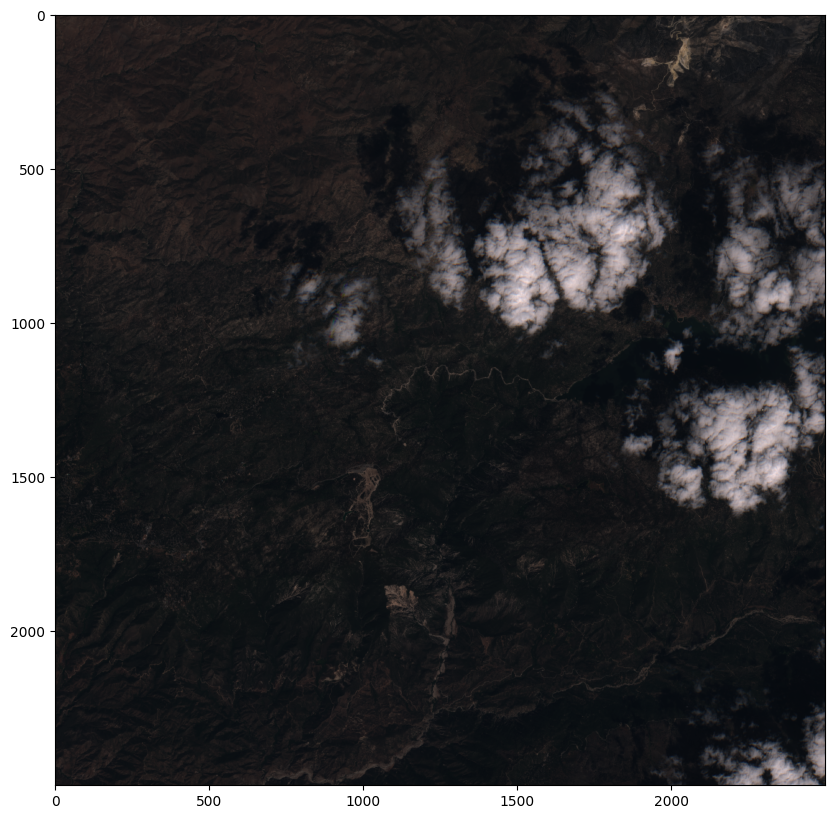

In [3]:
red = satellite_data[:, :, 3]  # Banda roja
green = satellite_data[:, :, 2]  # Banda verde
blue = satellite_data[:, :, 1]  # Banda azul

display = np.stack((red, green, blue), axis=-1)

# Display image

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(display)
plt.show()


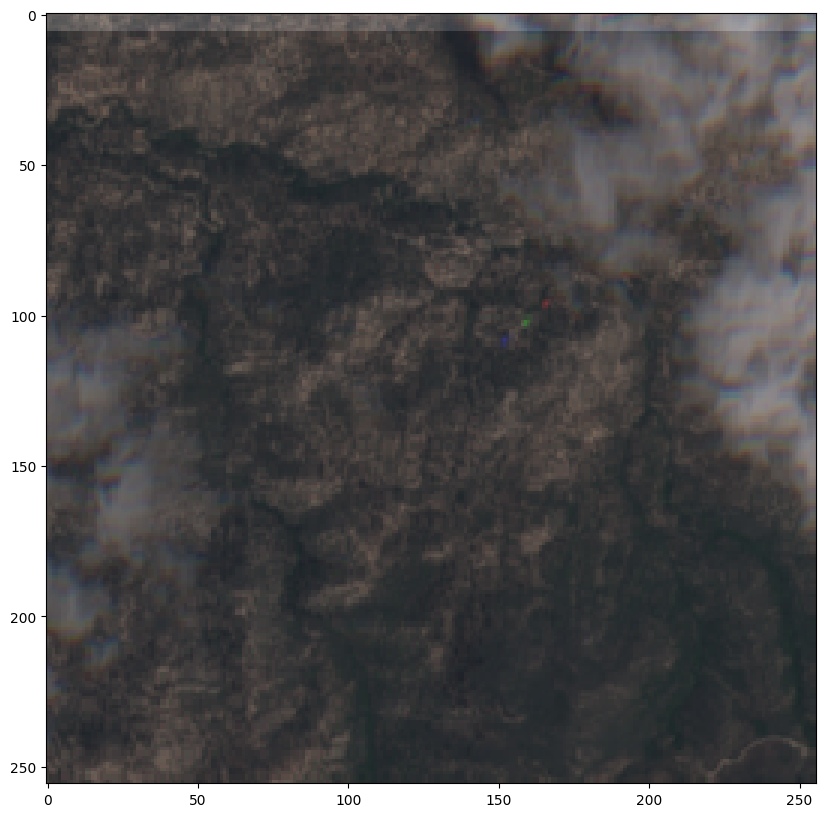

In [21]:
image_path_trial = 'hello.npy'
data = satellite_data[750:750+256,1000 :1000+256, :]
# Aplicar gamma correction a rgb
red = data[:, :, 3]
green = data[:, :, 2]
blue = data[:, :, 1]

gamma = 0.7

red = np.power(red, gamma)
green = np.power(green, gamma)
blue = np.power(blue, gamma)

# Save again in data, but not changing the rest of the bands

data[:, :, 3] = red
data[:, :, 2] = green
data[:, :, 1] = blue

display = np.stack((red, green, blue), axis=-1)

# Display image
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(display)
plt.show()

np.save(image_path_trial, data)

In [22]:
is_cloudy_test(image_path_trial)

Tile hello.npy is not cloudy (only 34.9% of pixels are cloudy).


({'cloudy_tiles': 0, 'clean_tiles': 1},
 array([[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [False, False, False, ..., False, False, False],
        [False,  True, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]),
 np.float64(0.3490142822265625),
 tensor([[[[0.5493, 0.5252, 0.6046,  ..., 0.7021, 0.7503, 0.6029],
           [0.6680, 0.6797, 0.8220,  ..., 0.8547, 0.8819, 0.7885],
           [0.6698, 0.7416, 0.7718,  ..., 0.8247, 0.8403, 0.8080],
           ...,
           [0.4714, 0.4989, 0.4939,  ..., 0.2673, 0.2665, 0.2431],
           [0.4814, 0.5750, 0.4940,  ..., 0.3032, 0.2416, 0.3000],
           [0.4663, 0.4599, 0.4866,  ..., 0.4440, 0.3299, 0.3540]]]]))

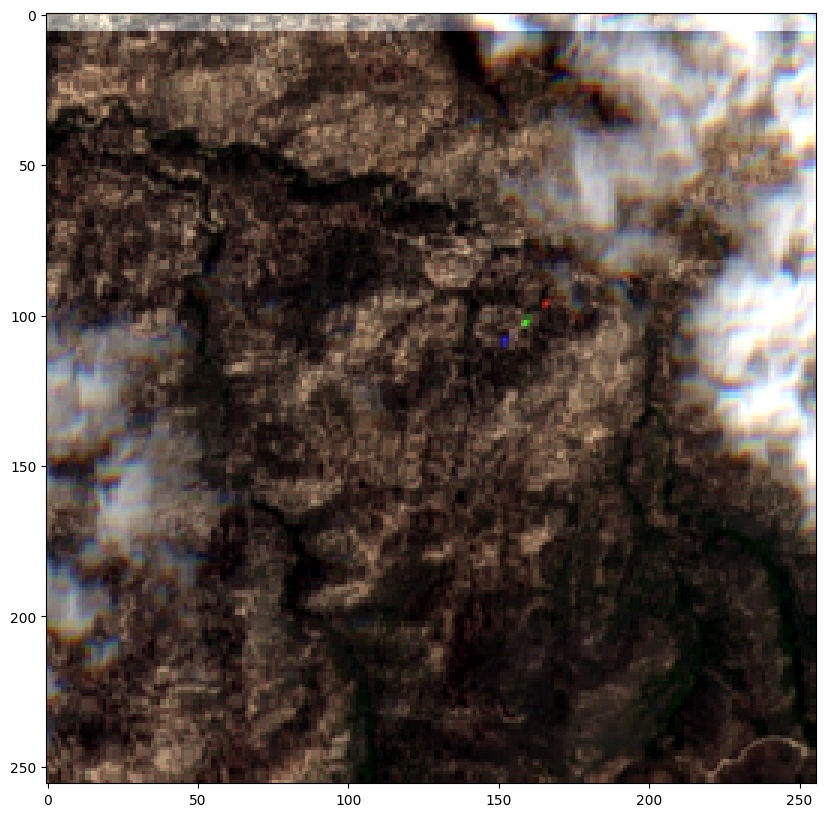

Tile hello.npy is not cloudy (only 34.9% of pixels are cloudy).


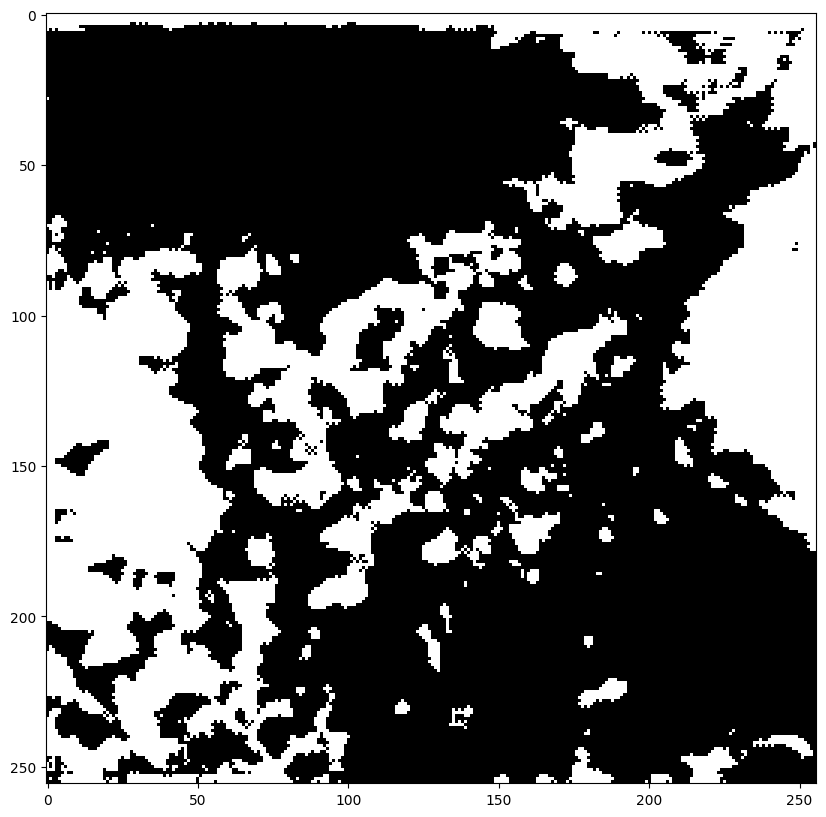

In [23]:
# Display data

red = data[:, :, 3]
green = data[:, :, 2]
blue = data[:, :, 1]

# Normalize data using p99 and p1, then clip to 0, 1

red = (red - np.percentile(red, 1)) / (np.percentile(red, 99) - np.percentile(red, 1))
green = (green - np.percentile(green, 1)) / (np.percentile(green, 99) - np.percentile(green, 1))
blue = (blue - np.percentile(blue, 1)) / (np.percentile(blue, 99) - np.percentile(blue, 1))

red = np.clip(red, 0, 1)
green = np.clip(green, 0, 1)
blue = np.clip(blue, 0, 1)

image = np.stack([red, green, blue], axis=-1)

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(image)
plt.show()

res, mask, prob, a = is_cloudy_test(image_path_trial)
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(mask, cmap='gray')
plt.show()

